# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [2]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [549]:
# Add any additional import statements you need here
# !pip install emoji
# !pip install nltk
import nltk
#nltk.download('stopwords')

#!pip install fsspec
#!pip install matplotlib
import fsspec
import matplotlib

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/lenny/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here.
    tokes = tokens.split()
    num_tokens = sum(map(len, (s.split() for s in tokes)))
    num_unique_tokens = len(set(w.lower() for w in tokes))
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum(list(map(len, tokes)))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text"""
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(descriptive_stats(text, verbose=False)[3] == 55)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: <!-- Your answer here --> Assertions are a form of unit tests.  This will allow the coder to know quickly if there are bugs present in his/her code.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [496]:
# Read in the lyrics data
artist_folders = os.listdir("lyrics/")
artist_folders = [f for f in artist_folders if os.path.isdir("lyrics/" + f)]

lyricsDict = {}
songtitleDict = defaultdict(list)
for artist in artist_folders : 
    artist_files = os.listdir("lyrics/" + artist)
    artist_files = [f for f in artist_files if 'txt' in f or 'csv' in f or 'tsv' in f]

    for f_name in artist_files : 
        with open("lyrics/" + artist + "/" + f_name) as infile : 
            lines = [line.strip() for line in infile]
            songtitleDict[artist].append(lines[0])
            lyricsDict[artist, lines[0]] = lines[1:]

In [107]:
# Read in the twitter data
base_path = "C://Users/lenny/twitter/"
twitter_files = os.listdir("twitter")
twitter_files = [f for f in twitter_files if f != ".DS_Store"]
artist_handles = list(set([name.split("_")[0] for name in twitter_files]))

descriptionDict = {}
for artist in artist_handles :
    follower_data_file = base_path + artist + "_followers_data.txt"
    df=pd.read_csv(follower_data_file)
    
    descriptionDict[artist] = df['Description']

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [128]:
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

In [356]:
# create your clean twitter data here
cleanDescDict = defaultdict(list)
for artist in artist_handles:
    for i in range(len(descriptionDict[artist])):
        raw_text = descriptionDict[artist][i]
        
        #handle nan's
        if pd.isnull(raw_text):
            raw_text = 'Missing Description'
        else:
            raw_text = raw_text
        
        #remove punctuation
        nopunct_data = "".join([ch for ch in raw_text if ch not in tw_punct])
        
        #fold to lowercase
        lower_data = nopunct_data.lower()
        
        #tokenize the data
        token_data = lower_data.split()
        
        #remove stopwords
        data_wo_sw = [word for word in token_data if not word in sw]
              
        #store in the new cleaned dictionary
        cleanDescDict[artist].append(data_wo_sw)

In [492]:
# create your clean lyrics data here
cleanLyricsDictByBand = defaultdict(list)
cleanLyricsDictBySong = defaultdict(list)
for (artist, song_name), lyric in lyricsDict.items():
    for i in range(len(lyricsDict[artist, song_name])):
        raw_text = lyricsDict[artist, song_name][i]
        
        #handle empty sets
        if raw_text == '':
            continue

        #remove punctuation
        nopunct_data = "".join([ch for ch in raw_text if ch not in tw_punct])
        
        #fold to lowercase
        lower_data = nopunct_data.lower()
        
        #tokenize the data
        token_data = lower_data.split()
        
        #remove stopwords
        data_wo_sw = [word for word in token_data if not word in sw]
              
        #store in the new cleaned dictionary
        cleanLyricsDictByBand[artist].append(data_wo_sw)
        cleanLyricsDictBySong[artist, song_name].append(data_wo_sw)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [414]:
# calls to descriptive_stats here

#twitter calls artist 1
mtrenchString = str(cleanDescDict['mtrench'])
descriptive_stats(mtrenchString, verbose=True)

There are 1015224 tokens in the data.
There are 158766 unique tokens in the data.
There are 9698305 characters in the data.
The lexical diversity is 0.156 in the data.


[1015224, 158766, 0.15638519183943642, 9698305]

In [415]:
#twitter calls artist 2
natewantstobtlString = str(cleanDescDict['NateWantsToBtl'])
descriptive_stats(natewantstobtlString, verbose=True)

There are 1159120 tokens in the data.
There are 187753 unique tokens in the data.
There are 10940916 characters in the data.
The lexical diversity is 0.162 in the data.


[1159120, 187753, 0.16197891503899509, 10940916]

In [427]:
#lyrics calls artist 1
marianastrenchString = str(cleanLyricsDictByBand['marianas trench'])
descriptive_stats(marianastrenchString, verbose=True)

There are 11740 tokens in the data.
There are 2583 unique tokens in the data.
There are 100070 characters in the data.
The lexical diversity is 0.220 in the data.


[11740, 2583, 0.22001703577512777, 100070]

In [428]:
#lyrics calls artist 2
natewantstobattleSting = str(cleanLyricsDictByBand['nate wants to battle'])
descriptive_stats(natewantstobattleSting, verbose=True)

There are 46246 tokens in the data.
There are 7826 unique tokens in the data.
There are 391629 characters in the data.
The lexical diversity is 0.169 in the data.


[46246, 7826, 0.16922544652510488, 391629]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The top 5 words would be dominated by stop words if those words were allowed to stay in the data.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I don't know that I had an expectation, but after seeing the results, it makes sense that the lexical data between artists would be low.  Many lyrics contain a majority of stop words and in addition, songs tend to repeat words (i.e. the chorus).



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [429]:
def is_emoji(s):
    return(s in emoji.UNICODE_EMOJI['en'])

assert(is_emoji("❤️"))
assert(not is_emoji(":-)"))

In [454]:
def extract_hash_tags(s):
    return set(part[1:] for part in s.split() if part.startswith('#'))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [455]:
# Your code here
for artist in artist_handles:
    emoji_list = []
    for i in range(len(descriptionDict[artist])):
        raw_text = descriptionDict[artist][i]
        
        #break down raw_text
        break_down = [ch for ch in str(raw_text)]
        
        #add the emoji to the list if it is an emoji
        for chct in break_down:
            if is_emoji(chct):
                emoji_list.append(chct)
    print("Here are the 10 most common emojis for " + artist + ":")
    print(Counter(emoji_list).most_common(10))

Here are the 10 most common emojis for NateWantsToBtl:
[('❤', 3561), ('🏳', 2829), ('✨', 2790), ('🌈', 2773), ('💜', 2419), ('💙', 1895), ('🖤', 1541), ('💖', 1071), ('💕', 1029), ('🔞', 1027)]
Here are the 10 most common emojis for mtrench:
[('❤', 5440), ('♥', 2678), ('✨', 2042), ('🌈', 1448), ('✌', 1386), ('🏻', 1179), ('🏳', 1114), ('💙', 1085), ('💜', 1061), ('💕', 917)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [465]:
# Your code here
for artist in artist_handles:
    hashtag_list = []
    for i in range(len(descriptionDict[artist])):
        raw_text = descriptionDict[artist][i]
        
        #handle nan's
        if pd.isnull(raw_text):
            raw_text = 'Missing Description'
        else:
            raw_text = raw_text
        
        #add the hashtag to the list if it is a hashtag
        for chct in raw_text.split():
            if chct[0] == '#':
                hashtag_list.append(chct)
                
    print("Here are the 10 most common hashtags for " + artist + ":")
    print(Counter(hashtag_list).most_common(10))

Here are the 10 most common hashtags for NateWantsToBtl:
[('#BlackLivesMatter', 292), ('#BLM', 266), ('#1', 195), ('#blacklivesmatter', 152), ('#StopAsianHate', 75), ('#JOYCONBOYZFOREVER', 65), ('#DnD', 61), ('#ENVtuber', 54), ('#ACAB', 49), ('#dnd', 44)]
Here are the 10 most common hashtags for mtrench:
[('#1', 204), ('#blacklivesmatter', 106), ('#teamfollowback', 98), ('#BlackLivesMatter', 96), ('#BLM', 88), ('#Trencher', 83), ('#', 71), ('#Directioner', 67), ('#TeamFollowBack', 61), ('#trencher', 49)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [513]:
# Your code here
mtrench_songs = []
natewantstobtl_songs = []
for artist in songtitleDict:
    for i in range(len(songtitleDict[artist])):
        raw_text = songtitleDict[artist][i]
        
        if artist == 'marianas trench':
            mtrench_songs.extend(raw_text.split())
        else:
            natewantstobtl_songs.extend(raw_text.split())

print("Here are the 5 most common words for Nate Wants to Battle:")
print(Counter(natewantstobtl_songs).most_common(5))

print("Here are the 5 most common words for Marianas Trench:")
print(Counter(mtrench_songs).most_common(5))

Here are the 5 most common words for Nate Wants to Battle:
[('The', 39), ('Of', 16), ('Me', 15), ('To', 15), ('My', 13)]
Here are the 5 most common words for Marianas Trench:
[('You', 6), ('To', 4), ('Of', 4), ('Me', 4), ('The', 4)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

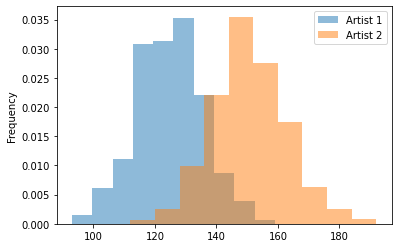

In [550]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: it matches on one or more whitespaces


In [514]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [537]:
# Your lyric length comparison chart here.
songlength = defaultdict(list)
for (artist, song_name), lyric in lyricsDict.items():
    raw_text = str(lyric)
    
    tokens = tokenize_lyrics(raw_text)
    token_length = len(tokens)
    
    songlength[artist].append(token_length)

In [556]:
mtrench_df = pd.DataFrame(songlength['marianas trench'], columns=['length'])
natewantstobtl_df = pd.DataFrame(songlength['nate wants to battle'], columns=['length'])

In [560]:
mtrench_df['artist'] = 'Marianas Trench'
natewantstobtl_df['artist'] = 'Nate Wants To Battle'

artist
Nate Wants To Battle    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

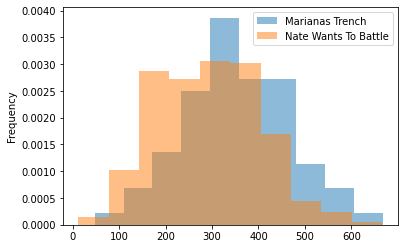

In [561]:
mtrench_df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)
natewantstobtl_df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)